In [1]:
import matplotlib.pyplot as plt
import numpy as np

### simulation parameters

In [2]:
population_size = 2.3e5

sample_size = 50
number_of_sampling = 500

### Generate the population of numbers

In [3]:
#f = np.linspace(0.001,5,18)
population  = 1/np.logspace(np.log10(0.001),np.log10(10),int(population_size))

trueMean = np.mean(population)

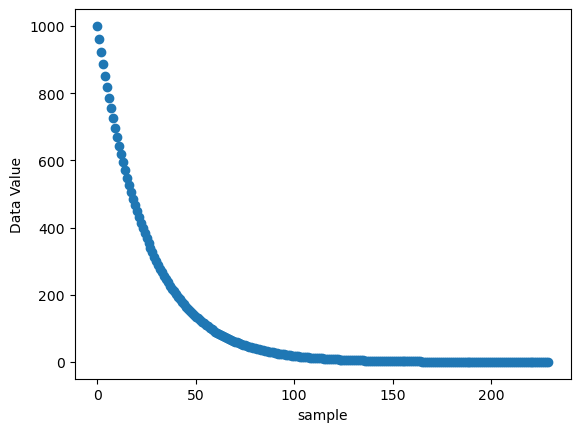

In [4]:
skip = int(1e3)
plt.plot(population[::skip],'o')
plt.xlabel('sample')
plt.ylabel('Data Value')
plt.show()

### Shuffle the Data

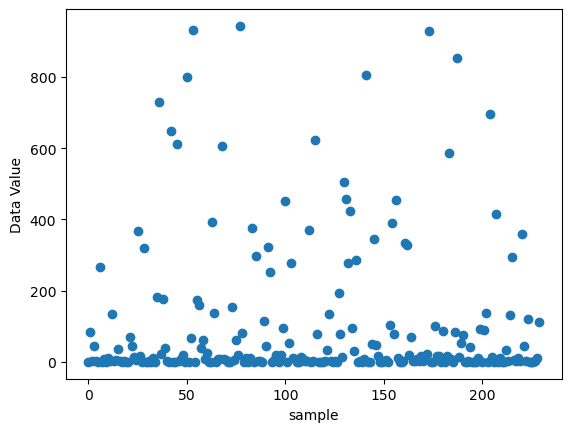

In [5]:
np.random.shuffle(population)
population

skip = int(1e3)
plt.plot(population[::skip],'o')
plt.xlabel('sample')
plt.ylabel('Data Value')
plt.show()

### Monte CarloSampling

In [6]:
samplemeans = np.zeros(number_of_sampling)

for expi in range(number_of_sampling):
    samplemeans[expi] = np.mean(np.random.choice(population, size = sample_size))

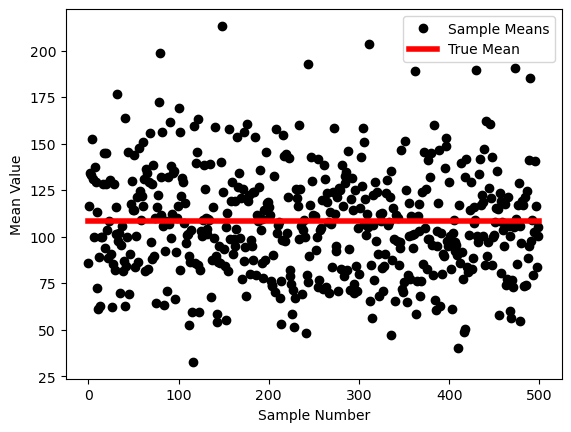

In [7]:
plt.plot(samplemeans, 'ko', label = "Sample Means")
plt.plot([0,number_of_sampling],[trueMean,trueMean], 'r', linewidth = 4, label = 'True Mean')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.show()

### Cumulative Average :
#### Computing average of upto ith sample

In [8]:
#by a for loop
cumavg = np.zeros(number_of_sampling)

for i in range(number_of_sampling):
    cumavg[i] = np.mean(samplemeans[:i+1])

In [9]:
#without a for loop

cumavg2 = np.cumsum(samplemeans)/ np.arange(1,number_of_sampling+1)

In [10]:
cumavg2 - cumavg

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.42108547e-14,
        0.00000000e+00, -1.42108547e-14,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.42108547e-14,
        0.00000000e+00,  1.42108547e-14,  1.42108547e-14,  1.42108547e-14,
        1.42108547e-14,  1.42108547e-14,  2.84217094e-14,  2.84217094e-14,
        1.42108547e-14,  2.84217094e-14,  1.42108547e-14,  1.42108547e-14,
        1.42108547e-14,  2.84217094e-14,  2.84217094e-14,  1.42108547e-14,
        2.84217094e-14,  1.42108547e-14,  1.42108547e-14,  1.42108547e-14,
        2.84217094e-14,  

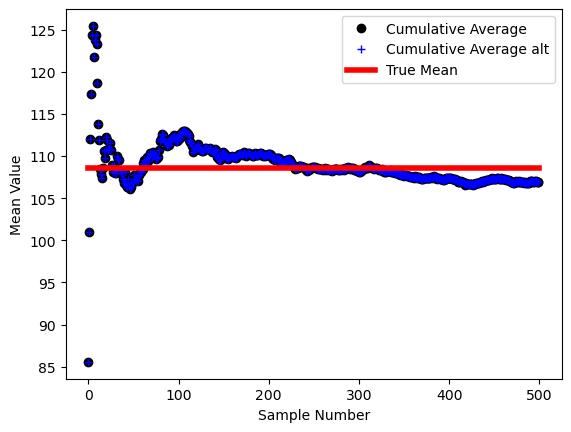

In [11]:
plt.plot(cumavg, 'ko', label = 'Cumulative Average')
plt.plot(cumavg2, 'b+', label = 'Cumulative Average alt')
plt.plot([0,number_of_sampling],[trueMean,trueMean], 'r', linewidth = 4, label = 'True Mean')
plt.legend()
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.show()

### Meta Sampling: Sample of Samples

In [34]:
number_of_meta_samples = 100
cumavgs = np.zeros((number_of_meta_samples,number_of_sampling))
allsamplemeans = np.zeros((number_of_meta_samples,number_of_sampling))

for metai in range(number_of_meta_samples):
    for expi in range(number_of_sampling):
        samplemeans[expi] = np.mean(np.random.choice(population, size = sample_size))
    #cumulative average divergences
    tmp = np.cumsum(samplemeans)/ np.arange(1,number_of_sampling+1)
    cumavgs[metai,:] = (tmp-trueMean)**2
    #store the samplemeans
    allsamplemeans[metai,:] = samplemeans
    
np.size(cumavgs)
    

50000

In [35]:
(tmp-trueMean)**2

array([2.50380319e+02, 7.59822714e+01, 3.82665370e+01, 4.37534791e+02,
       2.35065291e+02, 1.94343327e+02, 1.14324834e+02, 7.54429590e+01,
       4.22317515e+01, 6.40632395e+01, 6.62465688e+01, 3.59495720e+01,
       6.05777751e+01, 3.01561457e+01, 2.12079238e+01, 4.03689899e+01,
       4.01254039e+01, 5.31437256e+01, 6.89098579e+01, 3.11729695e+01,
       2.89053695e+01, 4.23537263e+01, 5.00828700e+01, 3.92341719e+01,
       4.36696396e+01, 3.15522726e+01, 1.92922979e+01, 2.09079427e+01,
       2.09484716e+01, 2.56480174e+01, 3.59694479e+01, 3.35608298e+01,
       2.78479822e+01, 1.31050117e+01, 1.59555563e+01, 1.65690375e+01,
       1.92135879e+01, 2.18687241e+01, 2.69092282e+01, 2.34763388e+01,
       3.70759686e+01, 2.75335279e+01, 2.79213011e+01, 2.93688813e+01,
       2.86298756e+01, 2.47871317e+01, 2.15603563e+01, 1.43775954e+01,
       2.13560479e+01, 1.69423260e+01, 1.57069868e+01, 1.43338331e+01,
       1.15985849e+01, 1.34277447e+01, 1.19673234e+01, 1.09172552e+01,
      

In [37]:
cumavgs

array([[2.68837149e+03, 7.08645731e+01, 1.42406303e+03, ...,
        1.25792402e+00, 1.25432209e+00, 9.80939748e-01],
       [9.57538509e+02, 5.38726621e+02, 2.45887981e+02, ...,
        2.08210752e+00, 2.14393251e+00, 1.97578463e+00],
       [1.51687089e+01, 6.59088720e-03, 8.66601978e+01, ...,
        1.88201189e-01, 1.90574388e-01, 2.32578984e-01],
       ...,
       [4.09415742e+01, 1.71052642e+02, 1.56030744e+02, ...,
        9.19045719e-01, 7.89233842e-01, 7.92484240e-01],
       [2.70520858e+02, 1.25143959e+02, 5.46530866e+02, ...,
        3.58220712e+00, 3.48119169e+00, 3.73267988e+00],
       [2.50380319e+02, 7.59822714e+01, 3.82665370e+01, ...,
        6.10291838e+00, 6.33501059e+00, 6.43087814e+00]])

### Cumulative Average Divergences

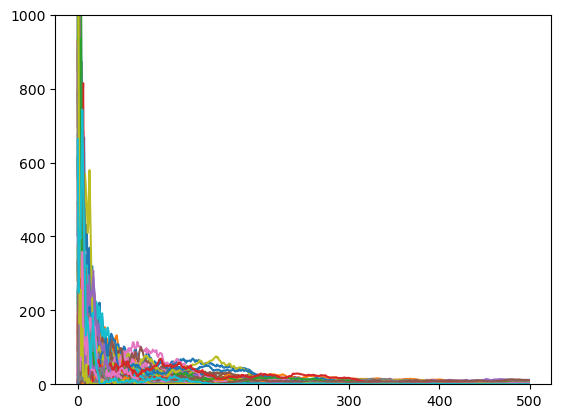

In [26]:
#transpose is done to swap the axes
plt.plot(cumavgs.T)
plt.ylim([0,1000])
plt.show()

### Application of CLT

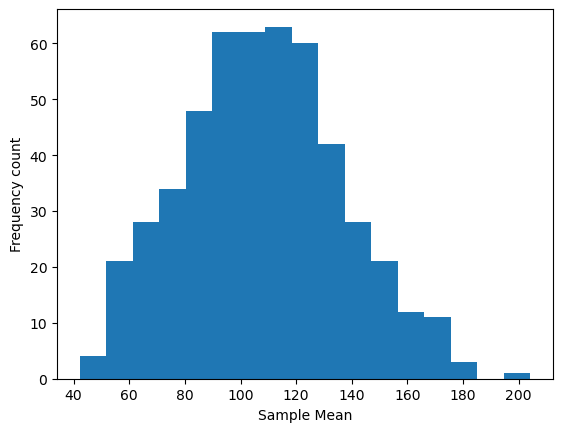

In [31]:
plt.hist(samplemeans, bins = 'fd') #friedman-diaconis method for selecting bin
plt.xlabel('Sample Mean')
plt.ylabel('Frequency count')
plt.show()

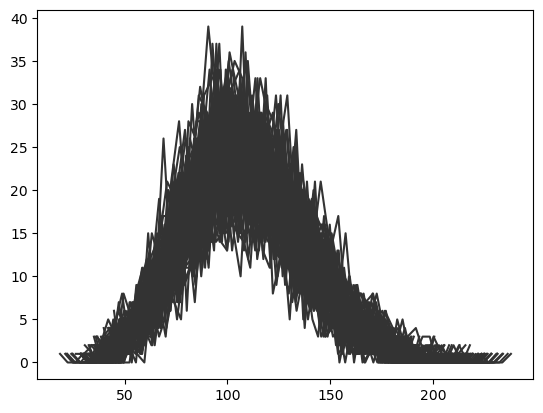

In [43]:
nbins = 50
for i in range(number_of_meta_samples):
    y,x = np.histogram(allsamplemeans[i,:], bins = nbins)
    x = (x[1:]+x[:-1])/2
    plt.plot(x,y, color = [0.2,0.2,0.2])

    
plt.show()


